In [1]:
# Imports
from importlib import reload
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import data_frame, sex_group_data, drug_type_data, age_group_data
reload(data_frame)
reload(sex_group_data)
reload(drug_type_data)
reload(age_group_data)



<module 'age_group_data' from '/Users/drew/Documents/GitHub/ECE-143-Group-2-24wi/Final_product/age_group_data.py'>

In [2]:
# Pandas.DataFrame setup
main_df = data_frame.get()
male_data, female_data = sex_group_data.get(main_df)
drug_data = drug_type_data.get(main_df)
age_data = age_group_data.get(main_df)

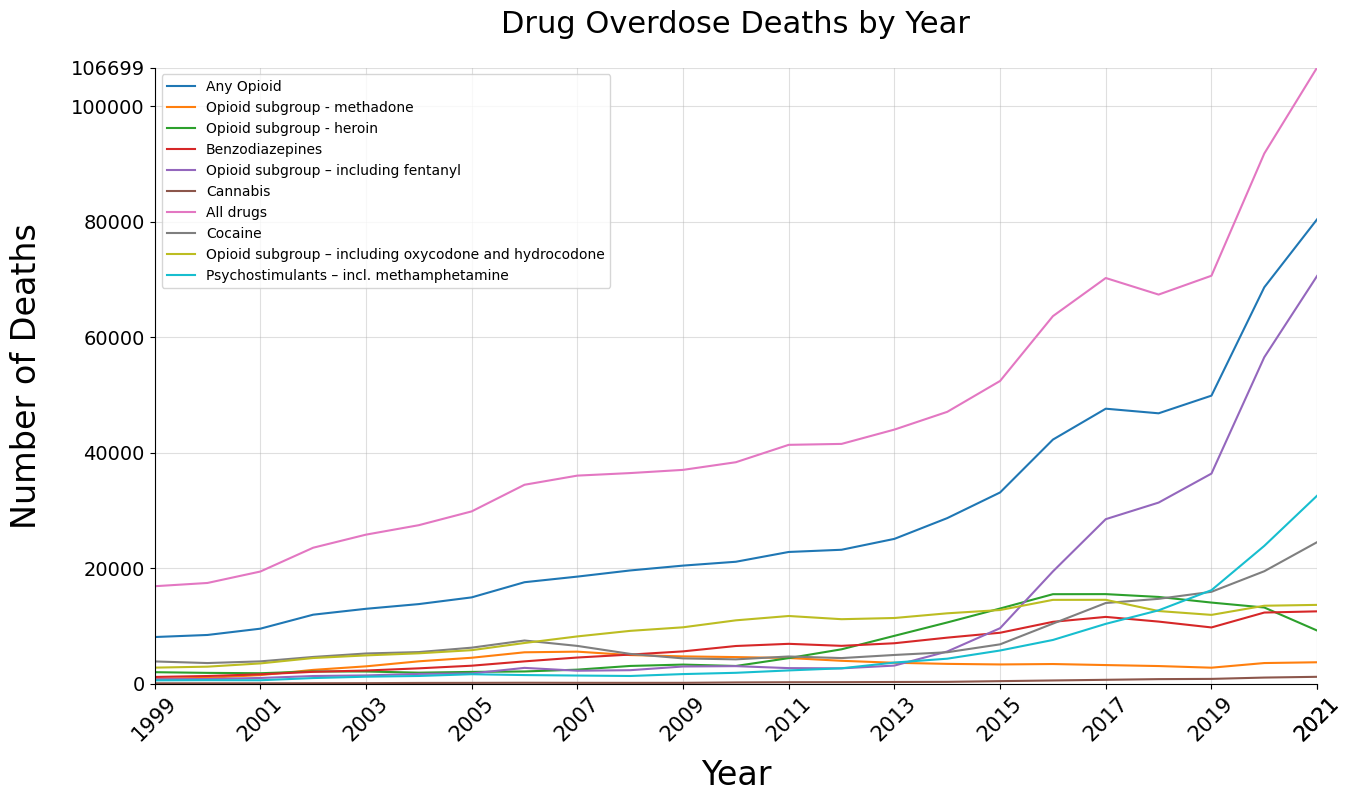

In [4]:
# Line Graph setup
drug_types = list(set(drug_data.index.get_level_values(0)))
years = list(set(drug_data.index.get_level_values(1)))
drug_data_fig = plt.figure(figsize=(15, 8))
drug_data_ax = drug_data_fig.add_subplot()

drug_data_ax.set_title('Drug Overdose Deaths by Year', size=22, pad=25)
drug_data_ax.spines['right'].set_visible(False)
drug_data_ax.spines['top'].set_visible(False)
drug_data_ax.grid(visible=True,
        which='major',
        axis='both',
        alpha=.4)

# Formatting X-Axis
drug_data_ax.set_xlabel('Year',
                        labelpad=10.0,
                        size=24)
drug_data_ax.set_xticks(list(range(1999,2022,2))+[2021])
drug_data_ax.set_xticklabels(years[::2]+[2021],
                             size=15,
                             rotation=45)
drug_data_ax.set_xlim(left=min(years),
                      right=max(years))

# Formatting Y-Axis
drug_data_ax.set_ylabel('Number of Deaths',
                        labelpad=20,
                        size=24)
drug_data_y_labels = [10000*scal                      # Multiples of 20,000
                      for scal in range(0,11,2)] \
                     +[max(drug_data['All drugs'])]
drug_data_ax.set_yticks(drug_data_y_labels)
drug_data_ax.set_yticklabels(labels=drug_data_y_labels,
                             size=14)
drug_data_ax.set_ylim(bottom=0,
                      top=drug_data['All drugs'][2021])

# Plotting lines for each drug
for drug in drug_types:
      drug_data_ax.plot(years,drug_data[drug], label=drug)

drug_data_ax.legend(loc='upper left')


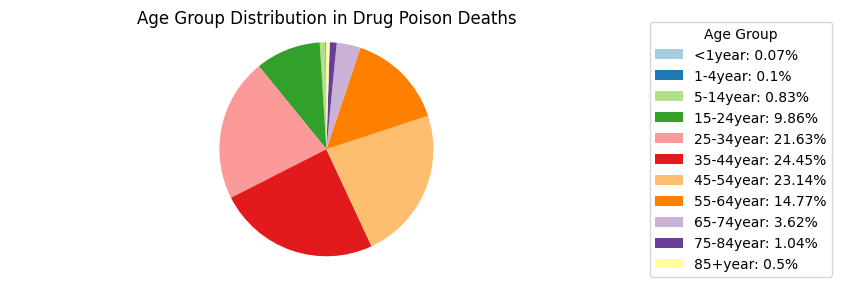

In [5]:
# Pie Chart setup
percentages = round(number=((age_data/age_data.sum()) * 100),
              ndigits=2)
colors_age = plt.cm.Paired(range(len(age_data)))
plt.figure(figsize=(15,3))
plt.subplot(1, 2, 2)
plt.pie(percentages, 
        colors=colors_age,
        startangle=90)

plt.axis('equal')
plt.title('Age Group Distribution in Drug Poison Deaths')

plt.legend(['{0}: {1}%'.format(age, percentages[age]) for age in age_data.index],
           title="Age Group",
           loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [6]:
# Bar labeling standard
def label(bars, ax):
    '''
    Given graphed bars, and the ax on which
    they are drawn on. Label each to the given
    standard below
    :Param:
    :rects: Rectangles Drawn
    :type: matplotlib.container.BarContainer
    :ax: Axis on which the bar is drawn on 
    :type: matplotlib.axes._axes.Axes
    :returns: None
    '''
    assert isinstance(bars, matplotlib.container.BarContainer)
    assert isinstance(ax, matplotlib.axes._axes.Axes)
    for rect in bars:
        height = rect.get_height()
        ax.annotate('{:,}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

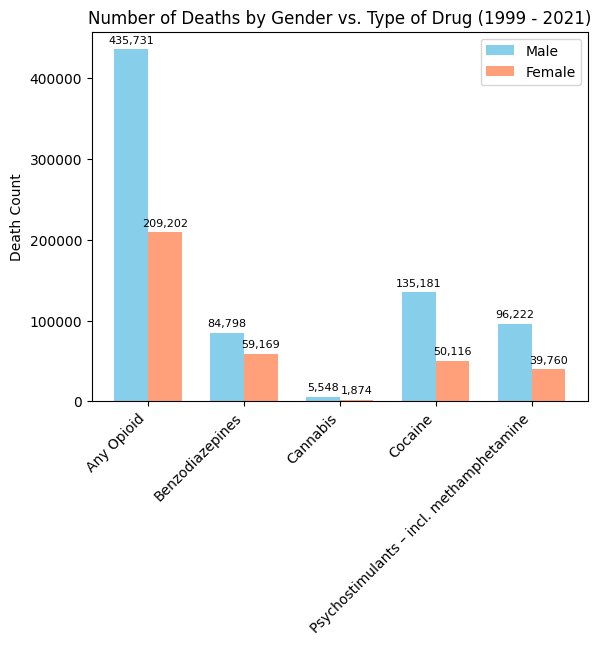

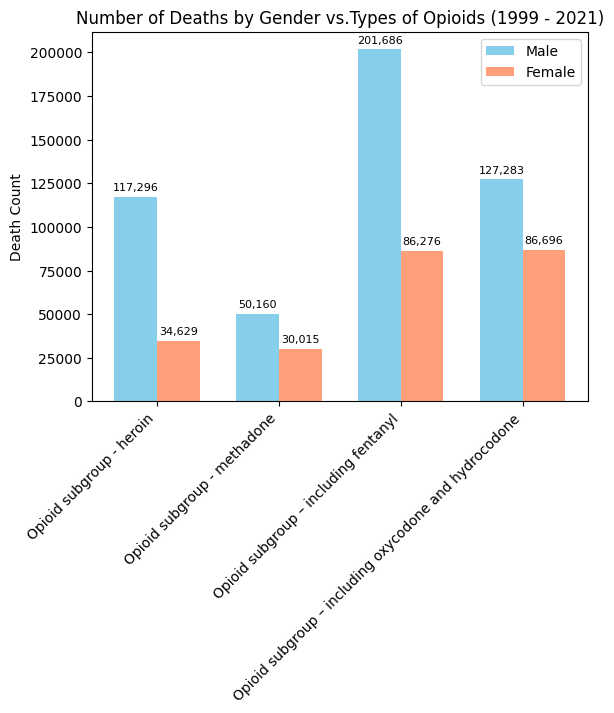

In [23]:
all_drugs = male_data.index

other_drugs = all_drugs.map(lambda x: not x.startswith('Opioid'))
other_drugs_label_range = np.arange(sum(other_drugs))

opioids_subgroups = all_drugs.map(lambda x: x.startswith('Opioid'))
opioids_subgroups_label_range = np.arange(sum(opioids_subgroups))

bar_width = 0.35

other_drugs_fig, other_drugs_ax = plt.subplots()
other_drugs_ax.set_title('Number of Deaths by Gender vs. Type of Drug (1999 - 2021)')

other_drugs_male_bars = other_drugs_ax.bar(x=(other_drugs_label_range - bar_width/2),
                                          height=male_data[other_drugs],
                                          width=bar_width,
                                          label='Male',
                                          color='skyblue')
other_drugs_female_bars = other_drugs_ax.bar(x=(other_drugs_label_range + bar_width/2),
                                            height=female_data[other_drugs],
                                            width=bar_width,
                                            label='Female',
                                            color='lightsalmon')

other_drugs_ax.set_ylabel('Death Count')
other_drugs_ax.set_xticks(other_drugs_label_range)
other_drugs_ax.set_xticklabels(all_drugs[other_drugs],
                               rotation=45,
                               ha='right')

other_drugs_ax.legend()
label(other_drugs_male_bars, other_drugs_ax)
label(other_drugs_female_bars, other_drugs_ax)
   
    

opioids_subgroups_fig, opioids_subgroups_ax = plt.subplots()
opioids_subgroups_ax.set_title('Number of Deaths by Gender vs.Types of Opioids (1999 - 2021)')

opioids_subgroups_male_bars = opioids_subgroups_ax.bar(x=(opioids_subgroups_label_range - bar_width/2),
                                                       height=male_data[opioids_subgroups],
                                                       width=bar_width,
                                                       label='Male',
                                                       color='skyblue')
opioids_subgroups_female_bars = opioids_subgroups_ax.bar(x=(opioids_subgroups_label_range + bar_width/2),
                                                         height=female_data[opioids_subgroups],
                                                         width=bar_width,
                                                         label='Female',
                                                         color='lightsalmon')

opioids_subgroups_ax.set_ylabel('Death Count')
opioids_subgroups_ax.set_xticks(opioids_subgroups_label_range)
opioids_subgroups_ax.set_xticklabels(labels=all_drugs[opioids_subgroups],
                                     rotation=45,
                                     ha='right')
opioids_subgroups_ax.legend()
label(bars=opioids_subgroups_male_bars, ax=opioids_subgroups_ax)
label(bars=opioids_subgroups_female_bars, ax=opioids_subgroups_ax)

[383214, 104660, 3561, 96121, 567980] [826062, 158113, 10761, 261355, 1183083]


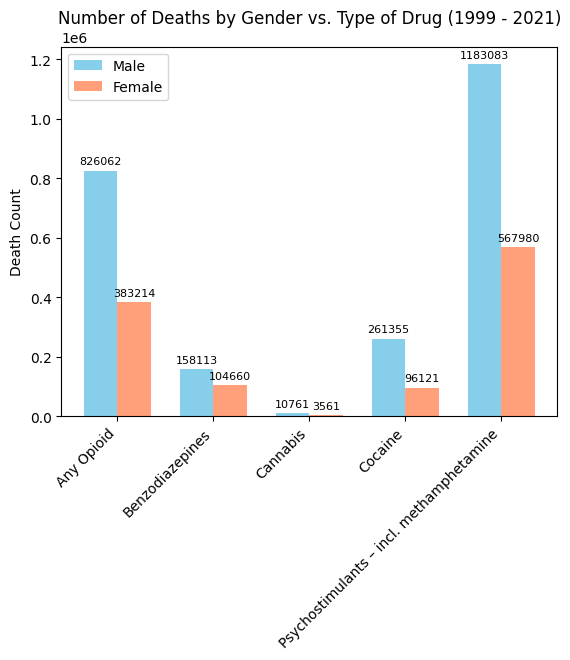

[67283, 55339, 162398, 276301] [228667, 94324, 389088, 558310]


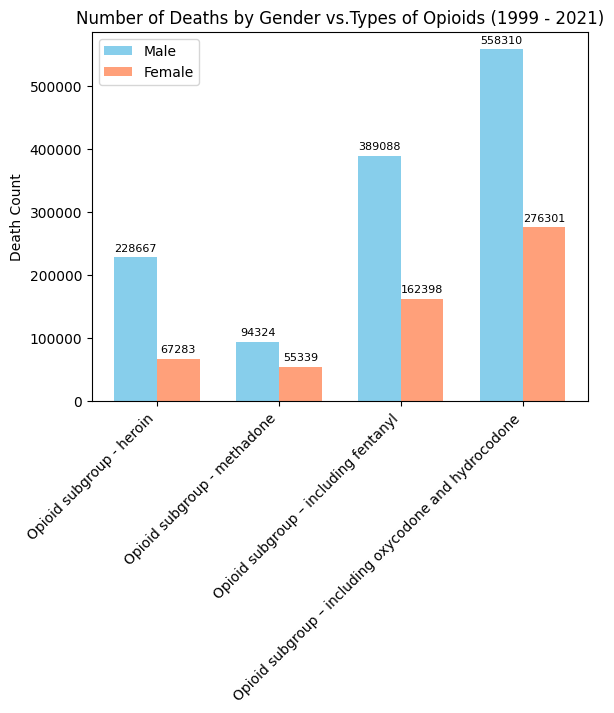

In [64]:
import csv

# Specify the path to your CSV file
csv_file_path = 'Drug_Poisoning_deaths_and_rates.csv'

data_list = []

with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)


    # Iterate through the rows and append each row to the data_list
    for row in csv_reader:
        data_list.append(row)

data_list[1]
# Find the indices of 'Gender' and 'Intent' columns
gender_index = data_list[0].index('Gender')
intent_index = data_list[0].index('Intent')
drug_index = data_list[0].index('Drug type')

# Filter the data for drug poison deaths
drug_poison_data = [row for row in data_list[2:-1] if row[gender_index] != 'Both sexes' 
                                                and row[drug_index] != 'All drugs' 
                                                and row[drug_index] != 'Opioid subgroup - heroin' 
                                                and row[drug_index] != 'Opioid subgroup - methadone' 
                                                and row[drug_index] != 'Opioid subgroup – including fentanyl'
                                                and row[drug_index] != 'Opioid subgroup – including oxycodone and hydrocodone'] 
drug_poison_data[:20]
# Count the occurrences of each gender in drug poison deaths
all_drug_counts_F = {'Any Opioid': 0, 'Benzodiazepines': 0, 'Cannabis':0,  'Cocaine':0,  'Psychostimulants – incl. methamphetamine':0}
all_drug_counts_M = {'Any Opioid': 0, 'Benzodiazepines': 0, 'Cannabis':0,  'Cocaine':0,  'Psychostimulants – incl. methamphetamine':0}

for row in drug_poison_data:
    drug = row[drug_index]
    gender = row[gender_index]
    if drug == 'Any Opioid':
        if gender == 'Male':
            all_drug_counts_M['Any Opioid'] += int(row[-1]) # all ages 
        else:
            all_drug_counts_F['Any Opioid'] += int(row[-1]) # all ages 
    if drug == 'Benzodiazepines':
        if gender == 'Male':
            all_drug_counts_M['Benzodiazepines'] += int(row[-1])
        else:
            all_drug_counts_F['Benzodiazepines'] += int(row[-1])
    if drug == 'Cannabis':
        if gender == 'Male':
            all_drug_counts_M['Cannabis'] += int(row[-1])
        else:
            all_drug_counts_F['Cannabis'] += int(row[-1])
    if drug == 'Cocaine':
        if gender == 'Male':
            all_drug_counts_M['Cocaine'] += int(row[-1])
        else:
            all_drug_counts_F['Cocaine'] += int(row[-1])
    else:
        if gender == 'Male':
            all_drug_counts_M['Psychostimulants – incl. methamphetamine'] += int(row[-1])
        else:
            all_drug_counts_F['Psychostimulants – incl. methamphetamine'] += int(row[-1])
# Calculate the amount of different genders:
female_data = list(all_drug_counts_F.values())
male_data = list(all_drug_counts_M.values())
print(female_data, male_data)
# graph 1
drugs = ['Any Opioid', 'Benzodiazepines', 'Cannabis', 'Cocaine', 'Psychostimulants – incl. methamphetamine']
x = np.arange(len(drugs))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_data, width, label='Male', color='skyblue')
rects2 = ax.bar(x + width/2, female_data, width, label='Female', color='lightsalmon')

ax.set_ylabel('Death Count')
ax.set_title('Number of Deaths by Gender vs. Type of Drug (1999 - 2021)')
ax.set_xticks(x)
ax.set_xticklabels(drugs, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

autolabel(rects1)
autolabel(rects2)

plt.savefig('Number of Deaths by Gender vs. Type of Drug (1999 - 2021).png', dpi=500)  

plt.show()
# Filter the data for drug poison deaths
drug_poison_data = [row for row in data_list[2:-1] if row[gender_index] != 'Both sexes' 
                                                and row[drug_index] != 'All drugs' 
                                                and row[drug_index] != 'Any Opioid'
                                                and row[drug_index] != 'Benzodiazepines'
                                                and row[drug_index] != 'Cannabis'
                                                and row[drug_index] != 'Cocaine' 
                                                and row[drug_index] != 'Psychostimulants – incl. methamphetamine'] 
# Count the occurrences of each gender in drug poison deaths
all_drug_counts_F = {'Opioid subgroup - heroin': 0, 'Opioid subgroup - methadone': 0, 'Opioid subgroup – including fentanyl':0,  'Opioid subgroup – including oxycodone and hydrocodone':0}
all_drug_counts_M = {'Opioid subgroup - heroin': 0, 'Opioid subgroup - methadone': 0, 'Opioid subgroup – including fentanyl':0,  'Opioid subgroup – including oxycodone and hydrocodone':0}

for row in drug_poison_data:
    drug = row[drug_index]
    gender = row[gender_index]
    if drug == 'Opioid subgroup - heroin':
        if gender == 'Male':
            all_drug_counts_M['Opioid subgroup - heroin'] += int(row[-1]) # all ages 
        else:
            all_drug_counts_F['Opioid subgroup - heroin'] += int(row[-1]) # all ages 
    if drug == 'Opioid subgroup - methadone':
        if gender == 'Male':
            all_drug_counts_M['Opioid subgroup - methadone'] += int(row[-1])
        else:
            all_drug_counts_F['Opioid subgroup - methadone'] += int(row[-1])
    if drug == 'Opioid subgroup – including fentanyl':
        if gender == 'Male':
            all_drug_counts_M['Opioid subgroup – including fentanyl'] += int(row[-1])
        else:
            all_drug_counts_F['Opioid subgroup – including fentanyl'] += int(row[-1])
    else:
        if gender == 'Male':
            all_drug_counts_M['Opioid subgroup – including oxycodone and hydrocodone'] += int(row[-1])
        else:
            all_drug_counts_F['Opioid subgroup – including oxycodone and hydrocodone'] += int(row[-1])
    
# Calculate the amount of different genders:
female_data = list(all_drug_counts_F.values())
male_data = list(all_drug_counts_M.values())
print(female_data, male_data)
# graph 1
drugs = ['Opioid subgroup - heroin', 'Opioid subgroup - methadone', 'Opioid subgroup – including fentanyl', 'Opioid subgroup – including oxycodone and hydrocodone']
x = np.arange(len(drugs))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_data, width, label='Male', color='skyblue')
rects2 = ax.bar(x + width/2, female_data, width, label='Female', color='lightsalmon')

ax.set_ylabel('Death Count')
ax.set_title('Number of Deaths by Gender vs.Types of Opioids (1999 - 2021)')
ax.set_xticks(x)
ax.set_xticklabels(drugs, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

autolabel(rects1)
autolabel(rects2)

plt.show()

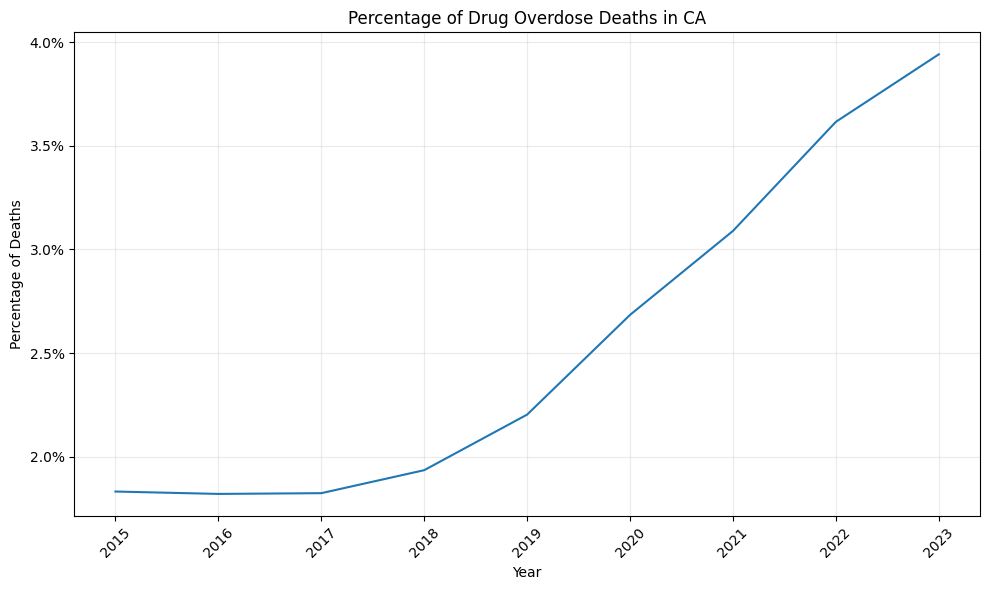

In [62]:
import csv

# Specify the path to your CSV file
csv_file_path = 'VSRR_Provisional_Drug_Overdose_Death_Counts.csv'

data_list = []

with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)
    # Iterate through the rows and append each row to the data_list
    for row in csv_reader:
        data_list.append(row)
        
# Find the indices of 'State' and 'Indicator' columns
State_index = 0
Indicator_index = data_list[0].index('Indicator')
Year_index = data_list[0].index('Year')
Data_index = data_list[0].index('Data Value')

# Filter the data for total number of death and drug overdose death from 2015 to 2023
total_death = [row for row in data_list[1:] if row[State_index] == 'CA' 
                                                and (row[Indicator_index] == 'Number of Deaths' 
                                                     or row[Indicator_index] == 'Number of Drug Overdose Deaths')] 
# finding total number of death and overdose death number of each year
total = {'2015':0 , '2016':0 , '2017':0 , '2018':0 , '2019':0 , '2020':0 , '2021':0 , '2022':0 , '2023':0}
overdose = {'2015':0 , '2016':0 , '2017':0 , '2018':0 , '2019':0 , '2020':0 , '2021':0 , '2022':0 , '2023':0}

for row in total_death:
    a = row[Indicator_index]
    b = row[Year_index]
    if a=='Number of Deaths':
        total[b] += int(row[Data_index].replace(',', ''))
    else:
        overdose[b] += int(row[Data_index].replace(',', ''))
        

# finding the percentage of the overdose death over overall death of each year
percentage = {'2015':0 , '2016':0 , '2017':0 , '2018':0 , '2019':0 , '2020':0 , '2021':0 , '2022':0 , '2023':0}
for x in ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']:
    percentage[x] = (overdose[x]/total[x])*100
# curve plot
plt.figure(figsize=(10, 6))
plt.grid(True,alpha=.25)
plt.plot(*zip(*sorted(percentage.items())))
plt.ylabel('Percentage of Deaths')
plt.xlabel('Year')
plt.title('Percentage of Drug Overdose Deaths in CA')
plt.yticks(ticks = np.arange(2.0,4.5,.5),labels=['2.0%','2.5%','3.0%','3.5%','4.0%' ])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
